In [14]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Scrapping

Resources:

**Beautiful Soup - a good g- to tool for parsing the DOM**  
https://www.crummy.com/software/BeautifulSoup/?

**Selenium - Browser automation (useful when you need to interact with javascript for more complex scraping)**  
https://www.seleniumhq.org/

**Scrapy - another package for scraping larger datasets at scale**  
https://scrapy.org/

In [4]:
with open('./Data/sample_page.html') as f:
    soup = BeautifulSoup(f, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link2">
    Tillie
   </a>
   ; and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [7]:
print(soup.title)
# <title>The Dormouse's story</title>

print(soup.title.name)
# u'title'

print(soup.title.string)
# u'The Dormouse's story'

print(soup.title.parent.name)
# u'head'

print(soup.p)
# <p class="title"><b>The Dormouse's story</b></p>

print(soup.p['class'])
# u'title'

print(soup.a)
# <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

print(soup.find_all('a'))
# [<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
#  <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
#  <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

print(soup.find(id="link3"))
# <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

<title>
    The Dormouse's story
   </title>
title

    The Dormouse's story
   
head
<p class="title">
<b>
     The Dormouse's story
    </b>
</p>
['title']
<a class="sister" href="http://example.com/elsie" id="link1">
     Elsie
    </a>
[<a class="sister" href="http://example.com/elsie" id="link1">
     Elsie
    </a>, <a class="sister" href="http://example.com/lacie" id="link2">
     Lacie
    </a>, <a class="sister" href="http://example.com/tillie" id="link2">
     Tillie
    </a>]
None


# Scrapping images

In [17]:
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
html_page = requests.get('http://books.toscrape.com/') #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
warning = soup.find('div', class_="alert alert-warning")
book_container = warning.nextSibling.nextSibling

In [11]:
images = book_container.findAll('img')
ex_img = images[0] #Preview an entry
ex_img

<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>

In [13]:
ex_img.attrs['src']

'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

In [16]:
url_base = "http://books.toscrape.com/"
url_ext = ex_img.attrs['src']
full_url = url_base + url_ext
r = requests.get(full_url, stream=True)
if r.status_code == 200:
    with open("Data/book1.jpg", 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

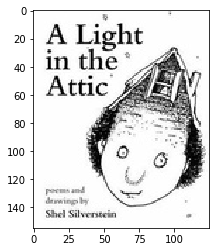

In [20]:
img = mpimg.imread("Data/book1.jpg")
imgplot = plt.imshow(img)
plt.show()

In [22]:
import pandas as pd
from IPython.display import Image, HTML

In [24]:
row1 = [ex_img.attrs['alt'], '<img src="Data/book1.jpg"/>']
df = pd.DataFrame(row1).transpose()
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))

,title,cover
0,A Light in the Attic,
